<a href="https://colab.research.google.com/github/sambhu18/Concepts-and-Technology-of-AI-/blob/main/classification_SambhuKamti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Final Portfolio/panic_attack_dataset.csv")
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [4]:
print("Dataset Overview:\n")
df.info()


Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1078 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake      

In [5]:
print("\nSummary Statistics:\n")
df.describe()



Summary Statistics:



,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,41.134167,4.412500,24.39250,120.302500,2.539167,2.955000,6.481583,4.416667,5.569167
std,346.554469,13.543412,2.847648,11.39993,23.369912,1.716854,2.061516,1.405625,2.902598,2.793155
min,1.000000,18.000000,0.000000,5.00000,80.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,300.750000,29.000000,2.000000,15.00000,100.000000,1.000000,1.000000,5.300000,2.000000,3.000000
50%,600.500000,42.000000,4.000000,24.00000,121.000000,3.000000,3.000000,6.500000,4.000000,6.000000
75%,900.250000,53.000000,7.000000,34.00000,141.000000,4.000000,5.000000,7.600000,7.000000,8.000000
max,1200.000000,64.000000,9.000000,44.00000,159.000000,5.000000,6.000000,9.000000,9.000000,10.000000


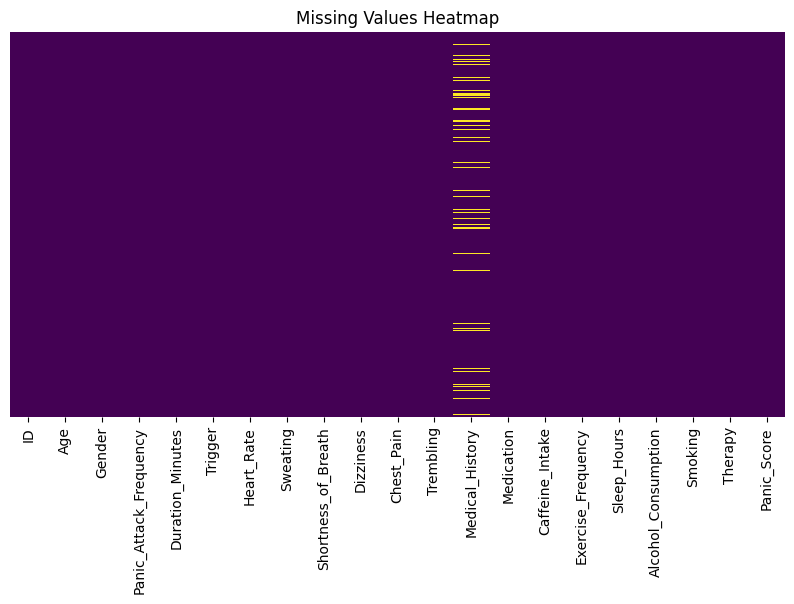

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-8-2255e7e2b687>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dizziness', data=df, palette="coolwarm")


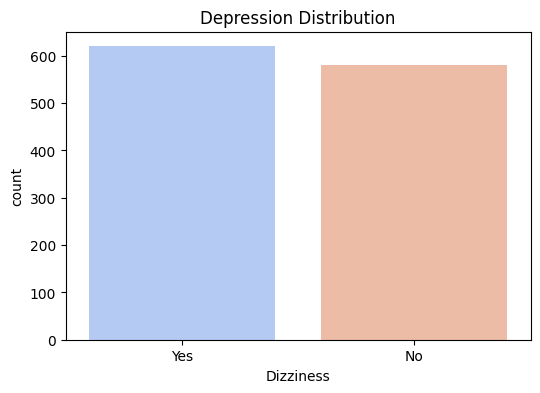

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dizziness', data=df, palette="coolwarm")
plt.title("Depression Distribution")
plt.show()

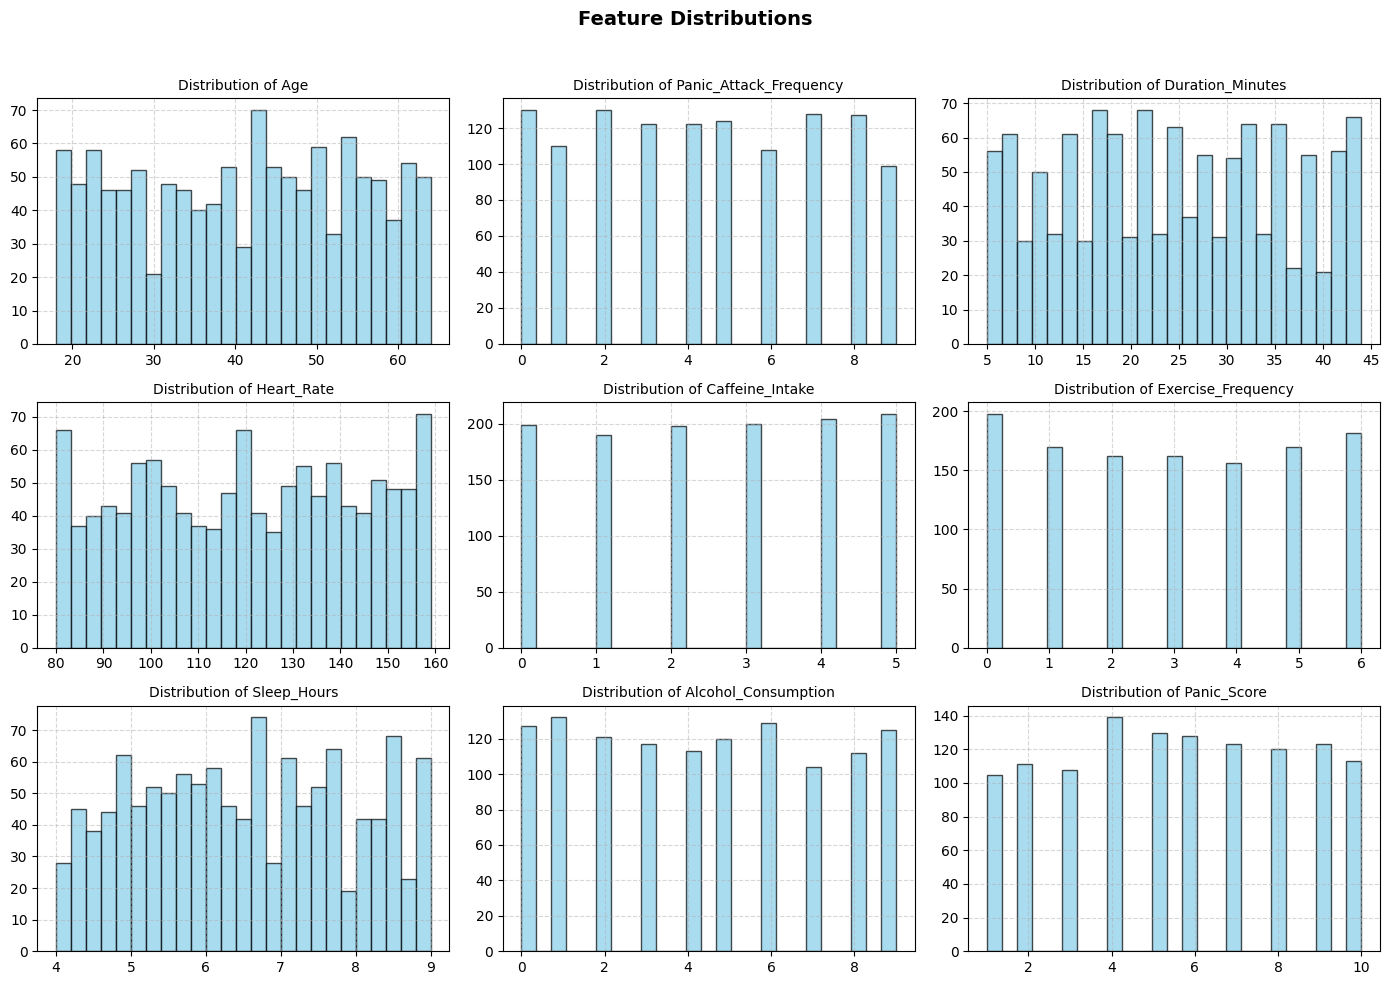

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Final Portfolio/panic_attack_dataset.csv"
df = pd.read_csv(file_path)

# Select only numerical columns for visualization
numerical_cols = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
                  'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
                  'Alcohol_Consumption', 'Panic_Score']

# Define subplot grid layout
num_features = len(numerical_cols)
cols = 3  # Number of columns in subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Compute rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each numerical feature
for i, col in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(df[col], bins=25, color='skyblue', edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {col}", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.5)

# Remove empty subplots if any (in case rows*cols > num_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
fig.suptitle("Feature Distributions", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Data preprocessing

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Handle Missing Values
df = df.copy()  # Ensure original DataFrame isn't modified
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [14]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Panic_Attack_Frequency,0
Duration_Minutes,0
Trigger,0
Heart_Rate,0
Sweating,0
Shortness_of_Breath,0
Dizziness,0


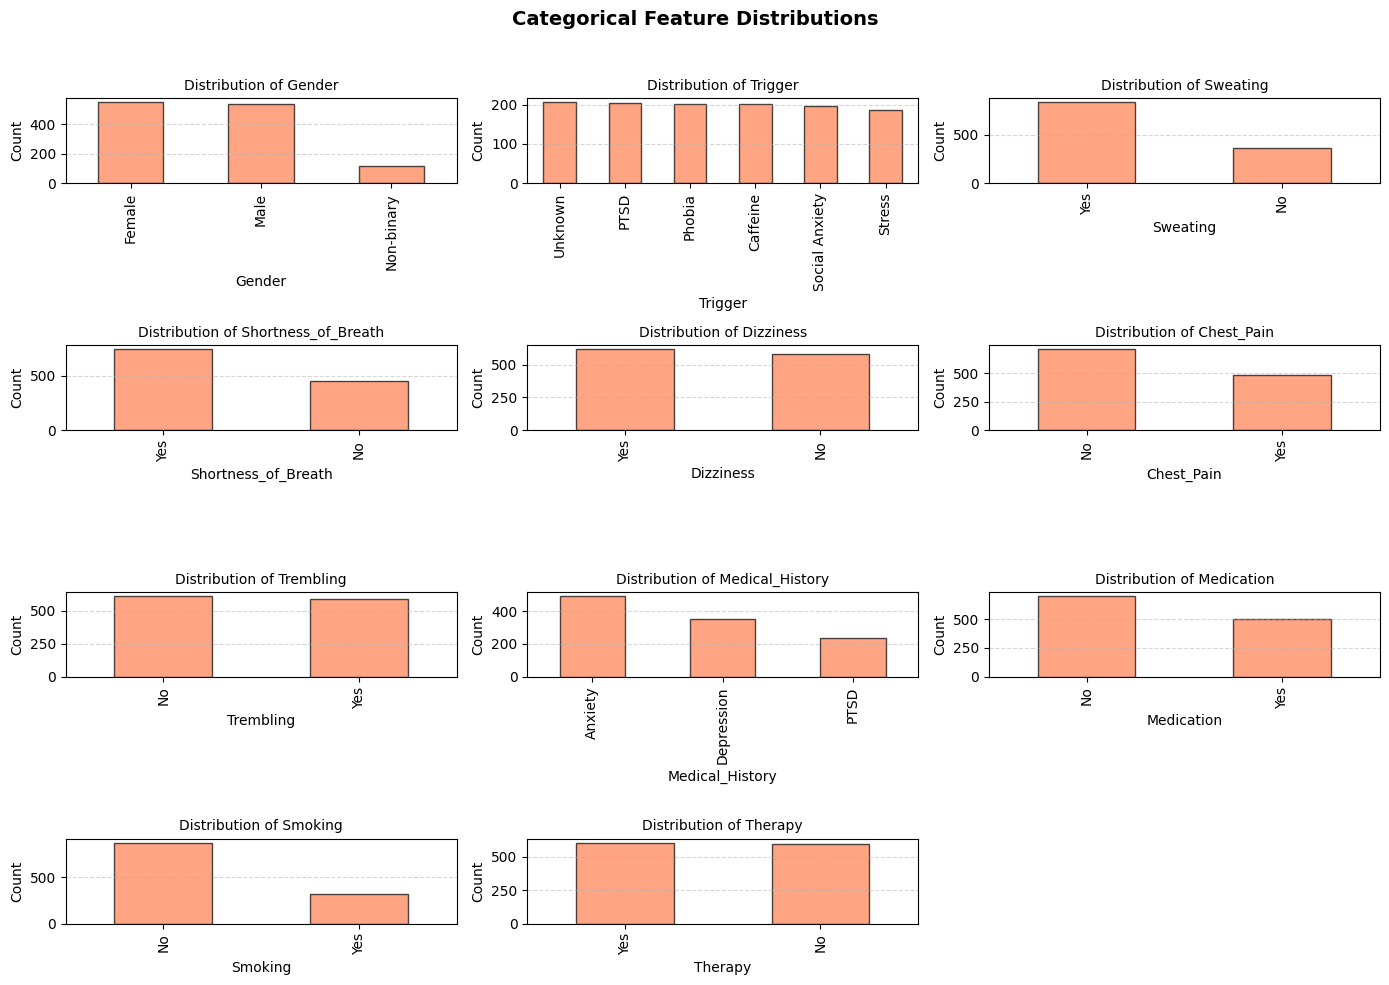

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Final Portfolio/panic_attack_dataset.csv"
df = pd.read_csv(file_path)

# Identify categorical columns (excluding numerical ones)
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']  # Select only categorical columns

# Define subplot grid layout
num_features = len(categorical_cols)
cols = 3  # Number of columns in subplot grid
rows = (num_features // cols) + (num_features % cols > 0)  # Compute rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(14, 10))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each categorical feature
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax, color='coral', edgecolor='black', alpha=0.7)
    ax.set_title(f"Distribution of {col}", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove empty subplots if any (in case rows*cols > num_features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
fig.suptitle("Categorical Feature Distributions", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [18]:
X = df.drop(columns=['Chest_Pain'])
y = df['Chest_Pain']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardization (Fit only on X_train, then transform both)
numerical_columns = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
                  'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
                  'Alcohol_Consumption', 'Panic_Score']

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
file_path = "/content/drive/MyDrive/Final Portfolio/panic_attack_dataset.csv"
df = pd.read_csv(file_path)

# Define target variable (assuming 'Panic_Score' is the target)
y = df['Panic_Score']
X = df.drop(columns=['Panic_Score', 'ID'])  # Drop ID (not useful for ML)

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
                     'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
                     'Alcohol_Consumption']
categorical_columns = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath',
                       'Dizziness', 'Trembling', 'Medical_History', 'Medication',
                       'Smoking', 'Therapy']

# **Step 1: Standardize Numerical Columns**
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# **Step 2: One-Hot Encode Categorical Columns**
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert encoded arrays back to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Reset index to avoid alignment issues
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# **Step 3: Merge Encoded Categorical Features with Standardized Numerical Features**
X_train_final = pd.concat([X_train[numerical_columns], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_columns], X_test_encoded_df], axis=1)

# **Step 4: Convert to NumPy Arrays**
X_train_final = X_train_final.to_numpy(dtype=np.float64)
X_test_final = X_test_final.to_numpy(dtype=np.float64)
y_train = y_train.to_numpy(dtype=np.float64)
y_test = y_test.to_numpy(dtype=np.float64)

# **Step 5: Confirm Shapes & Data Types**
print("X_train shape:", X_train_final.shape, "dtype:", X_train_final.dtype)
print("X_test shape:", X_test_final.shape, "dtype:", X_test_final.dtype)
print("y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("y_test shape:", y_test.shape, "dtype:", y_test.dtype)


X_train shape: (960, 35) dtype: float64
X_test shape: (240, 35) dtype: float64
y_train shape: (960,) dtype: float64
y_test shape: (240,) dtype: float64


In [24]:
df.head()

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5


In [25]:
def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np
  y = 1/(1 + np.exp(-x))
  return y

In [26]:
import numpy as np

def log_loss(y_true, y_pred):
    y_pred = np.asarray(y_pred)  # Ensure it's a NumPy array
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)  # Clip values
    loss = -(y_true * np.log(y_pred)) - ((1 - y_true) * np.log(1 - y_pred))
    return loss


In [44]:
def cost_function(y_true, y_pred):
    y_pred = np.asarray(y_pred)  # Convert to NumPy array if needed
    assert len(y_true) == len(y_pred), "Mismatch in `y_true` and `y_pred` lengths"

    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])  # Apply element-wise loss
    cost = np.dot(loss_vec, np.ones(n)) / n  # Mean loss
    return cost


In [28]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
      X (ndarray, shape (m,n)): data on features, m observations with n features.
      y (array_like, shape (m,)): array of true values of target (0 or 1).
      w (array_like, shape (n,)): weight parameters of the model.
      b (float): bias parameter of the model.
    Returns:
      cost (float): nonnegative cost corresponding to y and y_pred.
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    # Compute z using np.dot
    z = np.dot(X, w) + b

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(z)

    # Compute the cost using the cost function
    cost = cost_function(y, y_pred)
    return cost


In [29]:
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
      X (ndarray, shape (n,d)): Input data, n observations with d features
      y (array_like, shape (n,)): True labels (0 or 1)
      w (array_like, shape (d,)): Weight parameters of the model
      b (float): Bias parameter of the model
    Returns:
      grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
      grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape  # X has shape (n, d)
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    # Compute predictions using logistic function (sigmoid)
    y_pred = logistic_function(np.dot(X, w) + b)  # Compute z = X * w + b

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b =  np.dot(np.ones(n), (y_pred - y)) / n

    return grad_w, grad_b

In [30]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.

    Args:
      X (ndarray, shape (n,d)): Data on features, n observations with d features
      y (array_like, shape (n,)): True values of target (0 or 1)
      w (array_like, shape (d,)): Initial weight parameters
      b (float): Initial bias parameter
      alpha (float): Learning rate
      n_iter (int): Number of iterations
      show_cost (bool): If True, displays cost every 100 iterations
      show_params (bool): If True, displays parameters every 100 iterations

    Returns:
      w (array_like, shape (d,)): Optimized weight parameters
      b (float): Optimized bias parameter
      cost_history (list): List of cost values over iterations
      params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        # Compute gradients

        grad_w, grad_b = compute_gradient(X, y, w, b)

        # Update weights and bias
        w -=alpha * grad_w
        b -= alpha * grad_b

        # Compute cost
        cost = costfunction_logreg(X, y, w, b)

        # Store cost and parameters
        cost_history.append(cost)
        params_history.append((w.copy(), b))

        # Optionally print cost and parameters
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Gradient Magnitude = {np.linalg.norm(grad_w):.6f}")
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [31]:
def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.

    Arguments:
      X (ndarray, shape (n,d)): Array of test independent variables (features) with n samples and d features.
      w (ndarray, shape (d,)): Array of weights learned via gradient descent.
      b (float): Bias learned via gradient descent.
      threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.

    Returns:
      y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    # Compute the predicted probabilities using the logistic function
    y_test_prob =logistic_function(np.dot(X, w) + b)

    # Classify based on the threshold
    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [32]:
# Evaluation Function: Computes confusion matrix, precision, recall, and F1-score
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP =np.sum((y_true == 0) & (y_pred == 1))# False Positives
    FN =np.sum((y_true == 1) & (y_pred == 0)) # False Negatives

    # Confusion matrix
    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    # Precision, recall, and F1-score with safe handling of zero division
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Ensure metrics are floats
    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    # Return metrics as a dictionary
    return confusion_matrix, precision, recall, f1_score

In [33]:
#  Correct: Random small values for weights
np.random.seed(42)  # For reproducibility
w = np.random.randn(X_train.shape[1])   # Small random values
b = 0.0
alpha = 0.01
n_iter = 2000

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load dataset
file_path = "/content/drive/MyDrive/Final Portfolio/panic_attack_dataset.csv"
df = pd.read_csv(file_path)

# Define target variable (assuming 'Panic_Score' is the target)
y = df['Panic_Score']
X = df.drop(columns=['Panic_Score', 'ID'])  # Drop ID (not useful for ML)

# Split dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_columns = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate',
                     'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours',
                     'Alcohol_Consumption']
categorical_columns = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath',
                       'Dizziness', 'Trembling', 'Medical_History', 'Medication',
                       'Smoking', 'Therapy']

# **Step 1: Standardize Numerical Columns**
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# **Step 2: One-Hot Encode Categorical Columns**
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert encoded arrays back to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Reset index to avoid alignment issues
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# **Step 3: Merge Encoded Categorical Features with Standardized Numerical Features**
X_train_final = pd.concat([X_train[numerical_columns], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_columns], X_test_encoded_df], axis=1)

# **Step 4: Convert to NumPy Arrays**
X_train_final = X_train_final.to_numpy(dtype=np.float64)
X_test_final = X_test_final.to_numpy(dtype=np.float64)
y_train = y_train.to_numpy(dtype=np.float64)
y_test = y_test.to_numpy(dtype=np.float64)

# **Step 5: Confirm Shapes & Data Types**
print("✅ X_train shape:", X_train_final.shape, "dtype:", X_train_final.dtype)
print("✅ X_test shape:", X_test_final.shape, "dtype:", X_test_final.dtype)
print("✅ y_train shape:", y_train.shape, "dtype:", y_train.dtype)
print("✅ y_test shape:", y_test.shape, "dtype:", y_test.dtype)


✅ X_train shape: (960, 35) dtype: float64
✅ X_test shape: (240, 35) dtype: float64
✅ y_train shape: (960,) dtype: float64
✅ y_test shape: (240,) dtype: float64


In [41]:
# ✅ Ensure X_train and X_test are NumPy arrays
X_train = np.array(X_train_final, dtype=np.float64)
X_test = np.array(X_test_final, dtype=np.float64)

# ✅ Ensure w is a NumPy array with correct shape
w = np.array(w, dtype=np.float64).reshape(-1, 1)  # Convert w to column vector

# ✅ Ensure b is a float
b = float(b)

# ✅ Fix prediction function call
# y_train_pred = prediction(X_train, w, b)
# y_test_pred = prediction(X_test, w, b)



In [ ]:
print("X_train shape:", X_train.shape)  # (m, n)
print("w shape:", w.shape)  # Should be (n, 1)

w = np.zeros((X_train.shape[1], 1))  # Ensure w has the correct shape
b = float(b)

train_cost = costfunction_logreg(X_train, y_train, w, b)
test_cost = costfunction_logreg(X_test, y_test, w, b)

print(f"\nTrain Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")


In [ ]:
# Accuracy on test data
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

# Evaluation
confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
# pd.crosstab(y_test,y_pred)


Test Accuracy: 77.37%

Confusion Matrix:
[[1619  724]
 [ 539 2699]]
Precision: 0.79
Recall: 0.83
F1-Score: 0.81


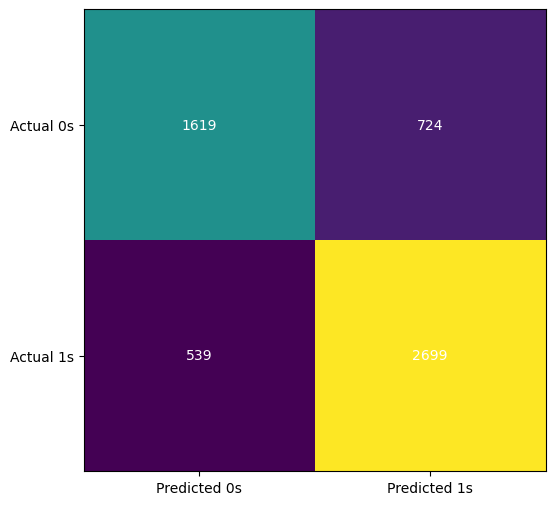

In [ ]:
# Visualizing Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Build Primary Models

## Logistic using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # You can adjust max_iter if convergence is an issue

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%')
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 83.84%
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      2343
         1.0       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix for Logistic Regression:
 [[1844  499]
 [ 403 2835]]


In [ ]:
#gives more accuracy while using sklearn

## KNN

In [ ]:
# Initialize the KNN model with k=5 (you can adjust k if needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix for KNN:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 80.63%
Classification Report for KNN:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      2343
         1.0       0.81      0.87      0.84      3238

    accuracy                           0.81      5581
   macro avg       0.80      0.79      0.80      5581
weighted avg       0.81      0.81      0.80      5581

Confusion Matrix for KNN:
 [[1686  657]
 [ 424 2814]]


Here Knn performance is lower than the Logistic

## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],  # Reduced from 100 to improve convergence
    'max_iter': [500, 1000],  # Increased max_iter
    'solver': ['lbfgs', 'saga']  # lbfgs is more stable
}

knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan']
}
# Logistic Regression Grid Search
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train, y_train)

# KNN Grid Search
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found for both models
print("Best hyperparameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best hyperparameters for KNN:", knn_grid_search.best_params_)


Best hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 500, 'solver': 'saga'}
Best hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'uniform'}


In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top 10 features using mutual information
selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_features}")

# Rebuild models using selected features
logreg.fit(X_train_selected, y_train)
knn.fit(X_train_selected, y_train)

# Evaluate models on the test set with selected features
logreg_accuracy = logreg.score(X_test_selected, y_test)
knn_accuracy = knn.score(X_test_selected, y_test)

print(f"Logistic Regression Accuracy with selected features: {logreg_accuracy}")
print(f"KNN Accuracy with selected features: {knn_accuracy}")


Selected feature indices: [  0   1   3   4   6   7  70  75  86 103]
Logistic Regression Accuracy with selected features: 0.83730514244759
KNN Accuracy with selected features: 0.8188496685181867


 # Final model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Apply feature selection to training and test sets
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train Logistic Regression with best hyperparameters
final_logreg = LogisticRegression(C=0.1, max_iter=500, solver='saga')
final_logreg.fit(X_train_selected, y_train)

# Train KNN with best hyperparameters
final_knn = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='uniform')
final_knn.fit(X_train_selected, y_train)

# Predictions
logreg_preds = final_logreg.predict(X_test_selected)
knn_preds = final_knn.predict(X_test_selected)

# Evaluate models
logreg_accuracy = accuracy_score(y_test, logreg_preds) * 100  # Convert to percentage
knn_accuracy = accuracy_score(y_test, knn_preds) * 100  # Convert to percentage

print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}%")
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_preds))

print("\nKNN Accuracy: {:.2f}%".format(knn_accuracy))
print("KNN Report:")
print(classification_report(y_test, knn_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))


Logistic Regression Accuracy: 83.75%
Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      2343
         1.0       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix:
 [[1846  497]
 [ 410 2828]]

KNN Accuracy: 82.49%
KNN Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      2343
         1.0       0.85      0.85      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.82      0.82      0.82      5581

Confusion Matrix:
 [[1852  491]
 [ 486 2752]]
